# Gradient Descent

Loss function:

$$ L(w) = \frac{1}{2m} \sum_{i = 1}^m(x^i w - y^i)^2 $$
$$ w^{new} = w^0 - \eta \frac{\partial L}{\partial w}
= w^0 - \eta \frac{1}{m} \sum_{i = 1}^m x^i (x^i w - y^i) $$

## Own implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def wnew(w0, eta, x, y):
    n = len(x[0])
    m = len(y)
    wnew = w0
    for j in range(0, n):
        sum = 0
        for i in range(0, m):
            xiw = 0
            for k in range(0, n):
                xiw += x[i][k] * w0[k]
            sum += x[i][j] * (xiw - y[i])
        wnew[j] -= eta / m * sum
    return wnew
    
def gradientDescent(x, y, eta=0.001, iterations=10000):
    w = np.random.randn(len(x[0]))
    for i in range(0, iterations):
        # eta = eta0 / (i + 1)
        w = wnew(w, eta, x, y)
    return w

In [23]:
m = 100
deg = 3
X = np.random.randn(m, 1) + 2
Y = X**2 - 4 * X + 5 + np.random.randn(m, 1)
pf = PolynomialFeatures(degree=deg)
Xpoly = pf.fit_transform(X)

Xtest = np.linspace(-2, 5, 1000).reshape(1000, 1)
Xtest_poly = pf.transform(Xtest)

In [24]:
w = gradientDescent(Xpoly, Y)

ypred = np.zeros(len(Xtest_poly))
for i in range(0, len(ypred)):
    for j in range(0, len(w)):
        ypred[i] += Xtest_poly[i][j] * w[j]

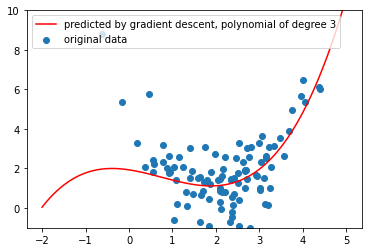

In [25]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="original data")
plt.plot(Xtest, ypred, c='r', label=f"predicted by gradient descent, polynomial of degree {deg}")
plt.ylim(-1, 10)
plt.legend()
plt.show()

## SGDRegressor

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.0001))
reg.fit(Xpoly, np.ravel(Y))
ypred = reg.predict(Xtest_poly)

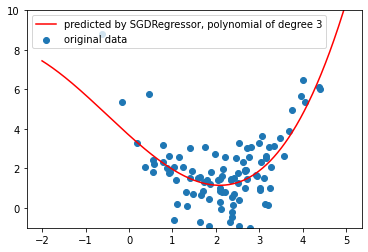

In [27]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="original data")
plt.plot(Xtest, ypred, c='r', label=f"predicted by SGDRegressor, polynomial of degree {deg}")
plt.ylim(-1, 10)
plt.legend()
plt.show()